In [13]:
# kinetics 

import pandas 

df = pandas.read_csv( 'clean/kinetics.csv' ) 

print( len( df.mutant.unique() ) ) 
print( df.columns ) 

31
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'protein_yield', 'dilution',
       'note', 'kobs', 's'],
      dtype='object')


In [14]:
from scipy.optimize import curve_fit
import numpy as np 

def my_curve_fit( f, xdata, ydata, p0 ):
    try:
        params, cov = curve_fit( f, xdata, ydata, p0 )
        return params, cov 
    except:
        return np.zeros( len( p0 ) ).replace( [ 0 ], np.nan )

In [15]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

In [16]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) != 24:
        print( idx, 'ain\'t got no (<24)' )

In [27]:
my_mutants = []
for idx, data in df.groupby( 'mutant' ):
    mutation = idx.split( '_' )[ 0 ] 
    params, cov = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    my_mutants.append( ( mutation, params, cov ) ) 

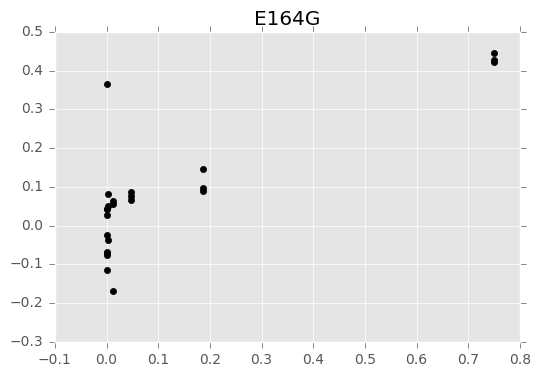

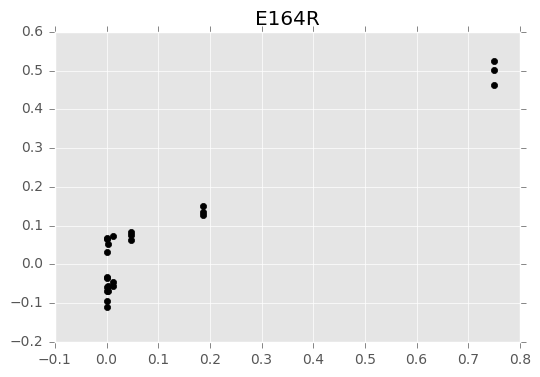

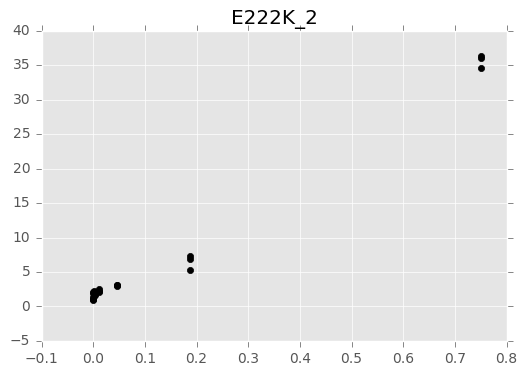

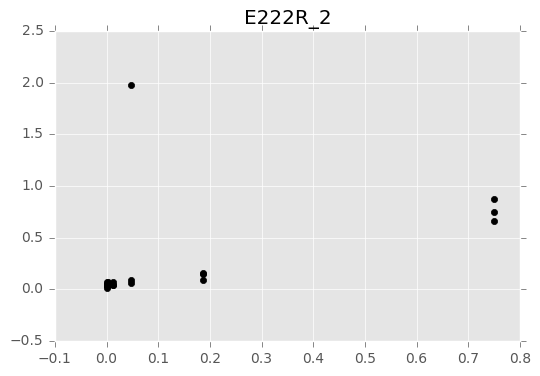

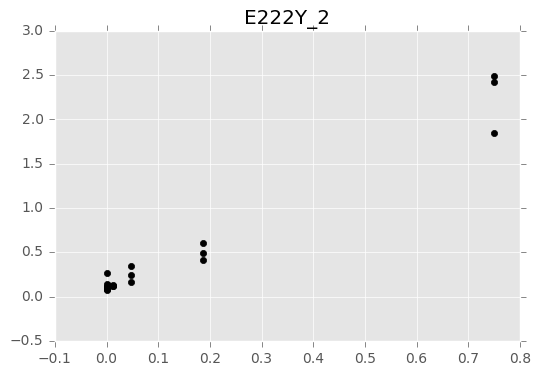

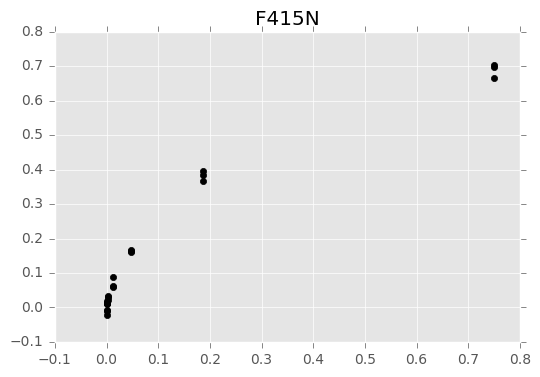

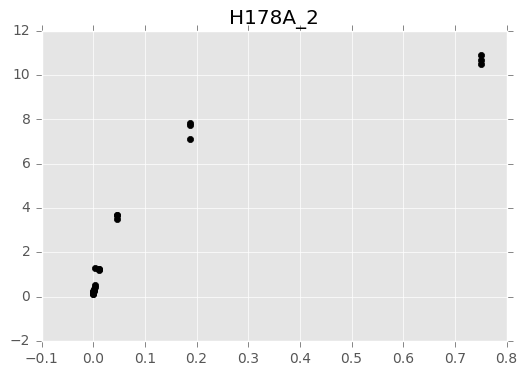

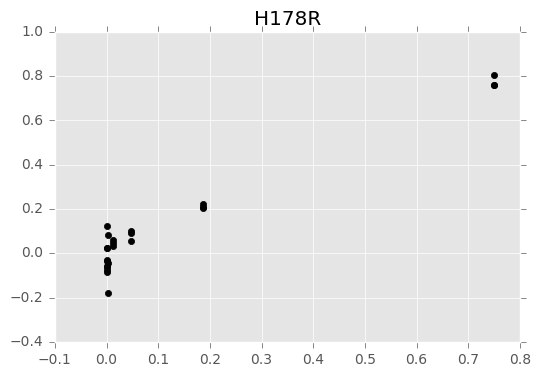

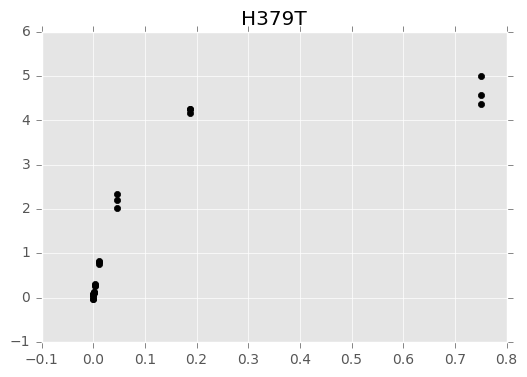

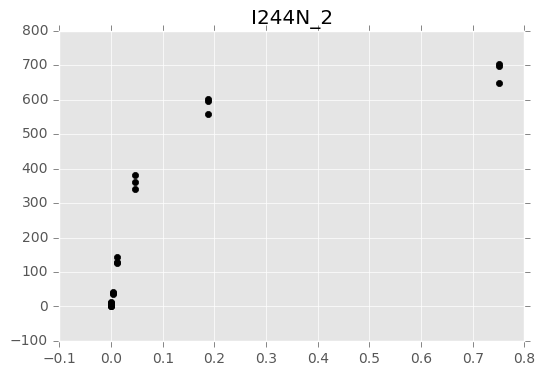

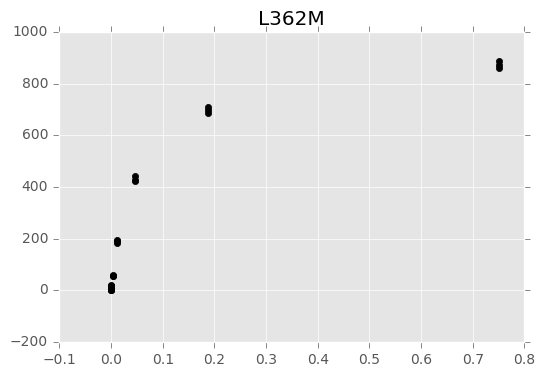

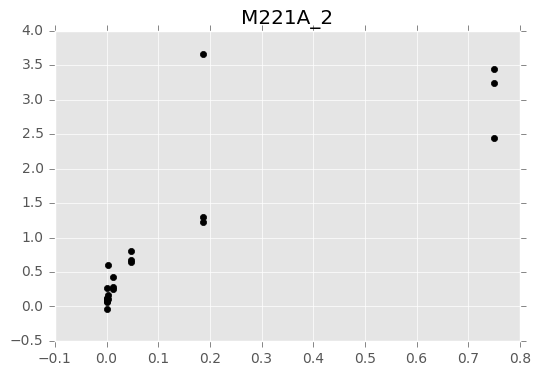

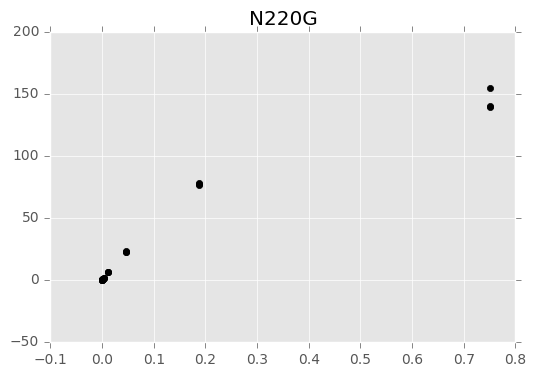

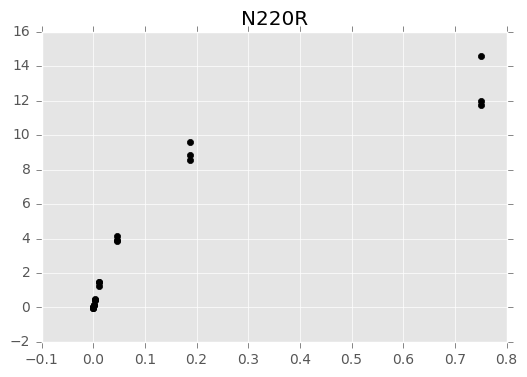

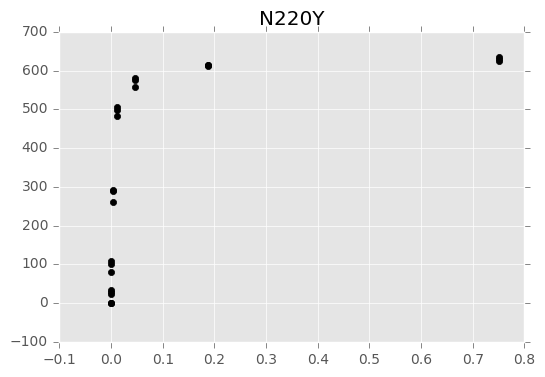

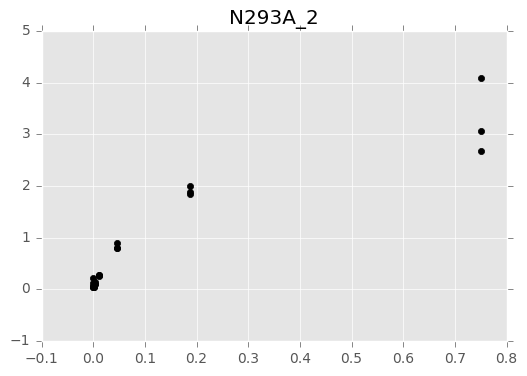

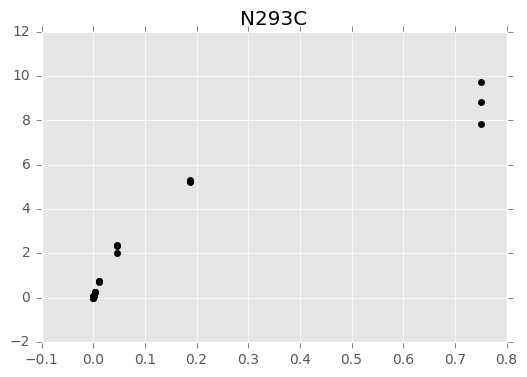

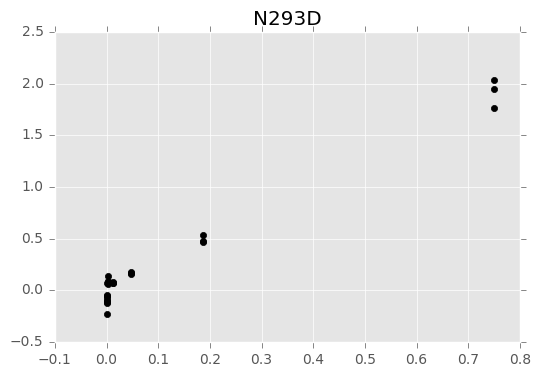

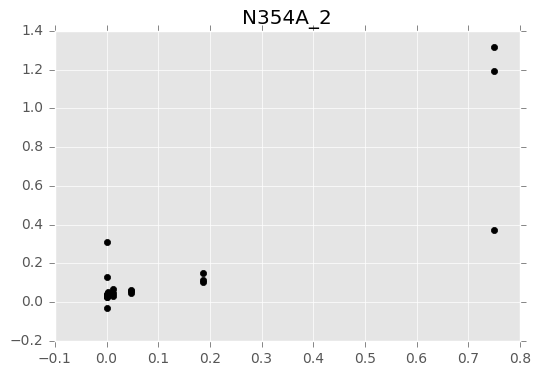

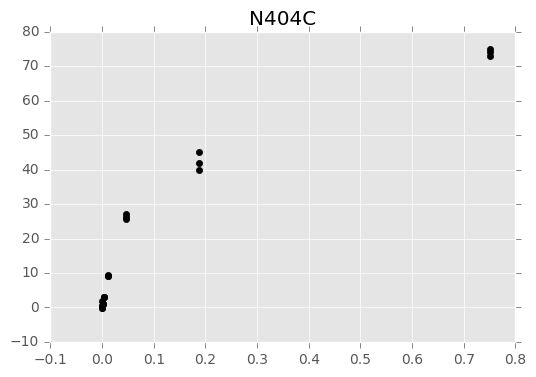

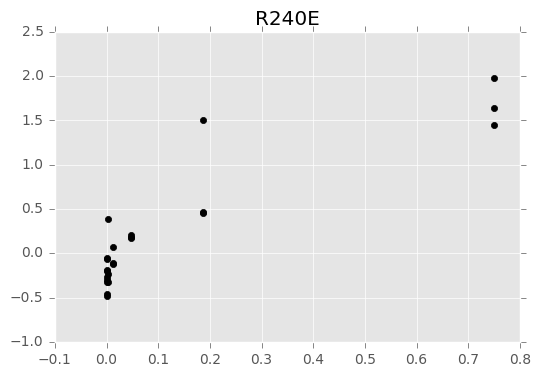

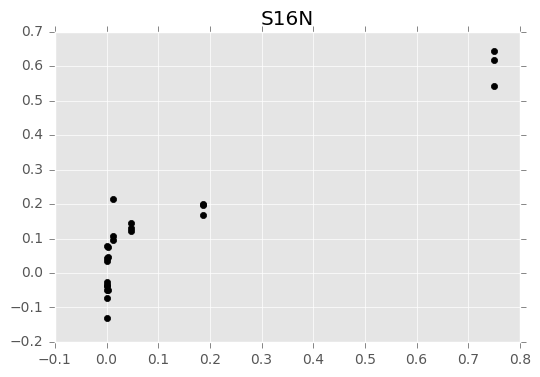

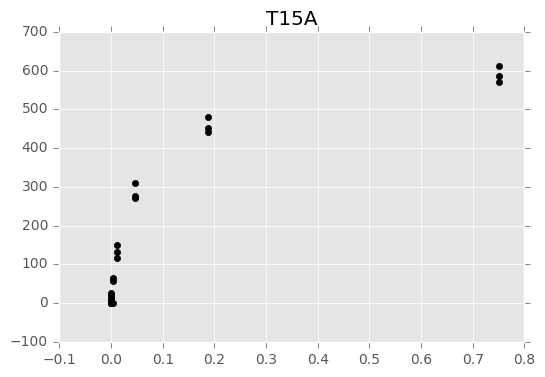

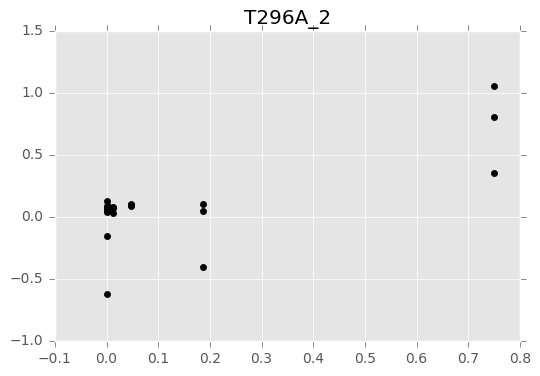

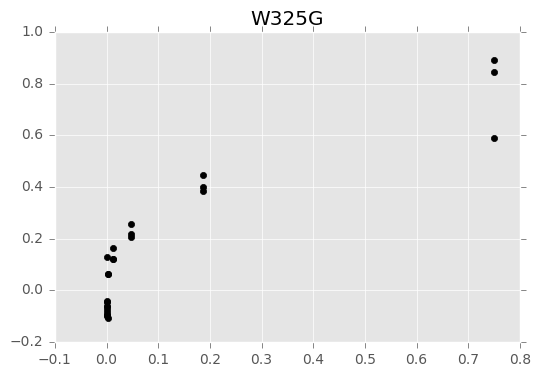

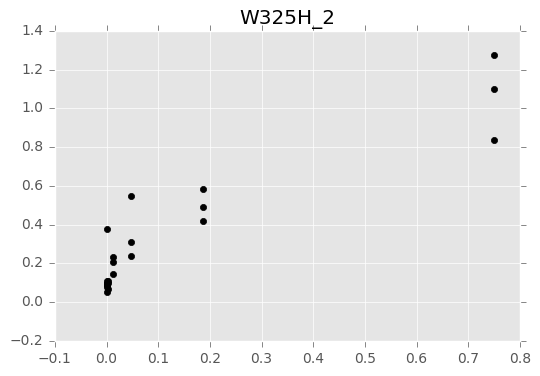

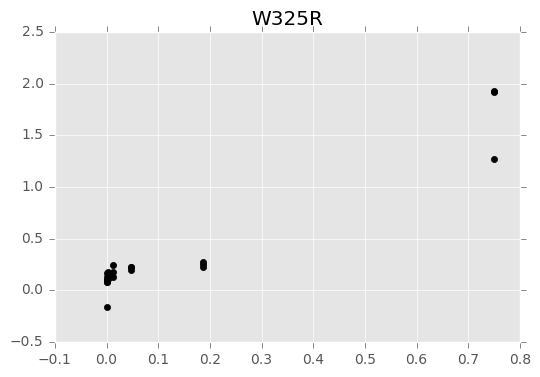

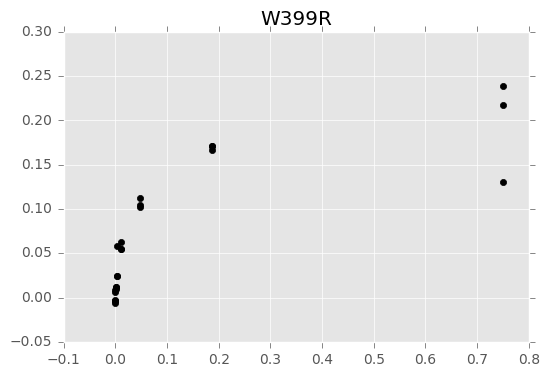

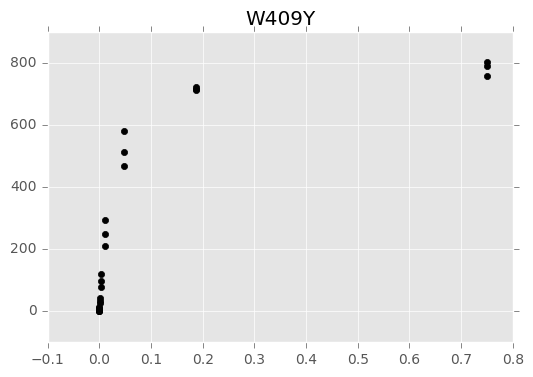

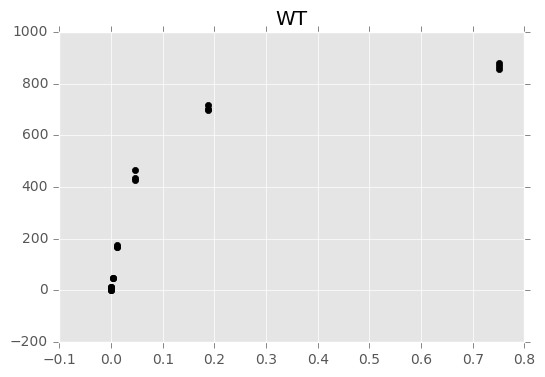

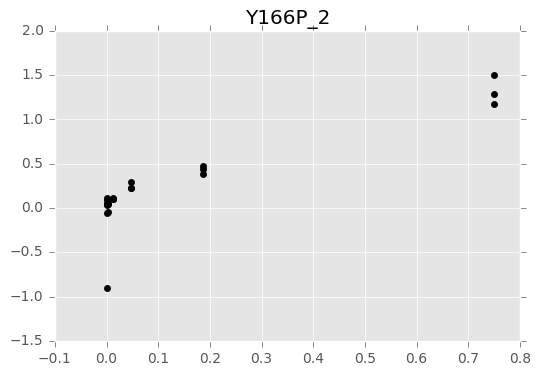

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

for idx, data in df.groupby( 'mutant' ):
    plt.scatter( data.s, data.kobs, color='k' )
    x_vals = np.linspace( data.s.min(), data.s.max(), 10 )
#    plt.plot( x_vals, v(  
    plt.title( idx ) 
    plt.show()